In [26]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

<IPython.core.display.Javascript object>


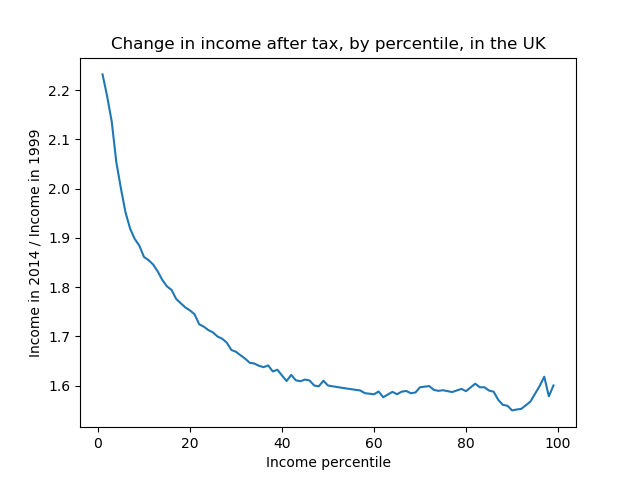

Text(0.5,1,'Change in income after tax, by percentile, in the UK')

In [29]:
def strip_cols(d):
    d2 = d.copy()
    d2.columns = d2.columns.get_level_values('year')
    return d2

start = 1999
end = 2014

d = (
    pd.read_csv('uk_income_dist_after_tax.tsv', sep='\t')
    .rename(columns={'Percentile point': 'percentile'})
    .set_index('percentile')
    .rename(columns=lambda c: c[:4])
    .drop('2008', axis=1)
    .reset_index()
    .melt('percentile', var_name='year', value_name='income')
    .assign(year=lambda d: d.year.astype(int))
    .assign(income=lambda d: d.income.str.replace(',', '').astype(float))
    .set_index(['year', 'percentile'])
    .loc[([start, end], slice(None))]
    .unstack(level='year')
    .pipe(strip_cols)
    .assign(ratio=lambda d: d[end] / d[start])
)

fig = plt.figure()
ax = fig.gca()
d.ratio.plot(ax=ax)
ax.set_ylabel(f'Income in {end} / Income in {start}')
ax.set_xlabel('Income percentile')
ax.set_title('Change in income after tax, by percentile, in the UK')